In [1]:
#Data Preprocessing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [8]:
data = pd.read_csv(r"C:\Users\aarsh\Downloads\L - Task3 - Data Preprocessing\Employee.csv")

In [9]:
data

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [10]:
data.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [11]:
data.tail()

,Company,Age,Salary,Place,Country,Gender
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1
147,Infosys,22.0,8202.0,Cochin,India,0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [13]:
data.describe(include='all')

,Company,Age,Salary,Place,Country,Gender
count,140,130.000000,124.000000,134,148,148.000000
unique,6,NaN,NaN,11,1,NaN
top,TCS,NaN,NaN,Mumbai,India,NaN
freq,53,NaN,NaN,37,148,NaN
mean,NaN,30.484615,5312.467742,NaN,NaN,0.222973
std,NaN,11.096640,2573.764683,NaN,NaN,0.417654
min,NaN,0.000000,1089.000000,NaN,NaN,0.000000
25%,NaN,22.000000,3030.000000,NaN,NaN,0.000000
50%,NaN,32.500000,5000.000000,NaN,NaN,0.000000
75%,NaN,37.750000,8000.000000,NaN,NaN,0.000000


In [14]:
data.isnull().sum()

Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

In [15]:
data.notnull().sum()

Company    140
Age        130
Salary     124
Place      134
Country    148
Gender     148
dtype: int64

In [16]:
data.duplicated().sum()

4

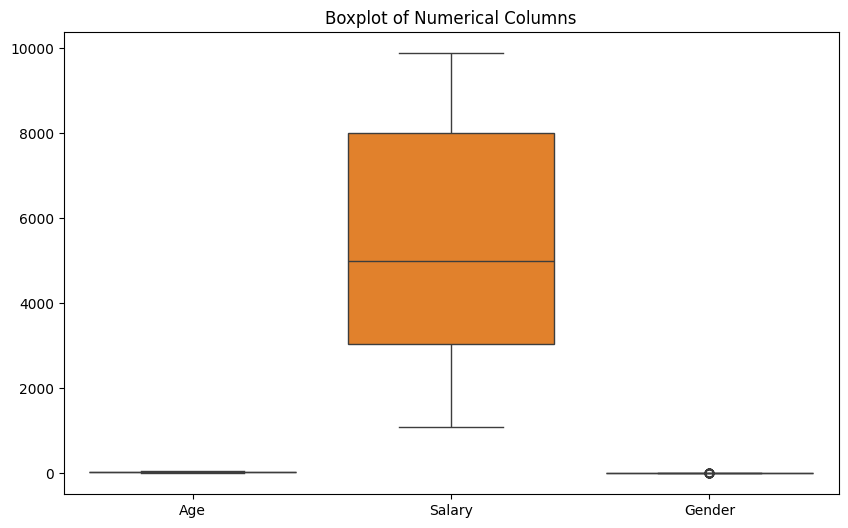

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.title('Boxplot of Numerical Columns')
plt.show()

C:\Users\aarsh\AppData\Local\Temp\ipykernel_20408\173789176.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Salary'])


Text(0.5, 1.0, 'Distribution Plot of Salary')

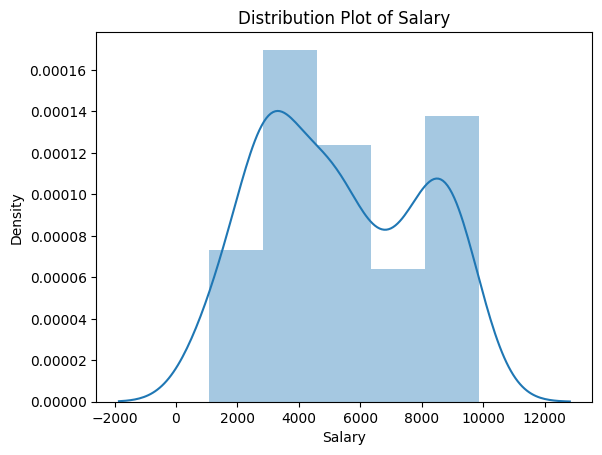

In [18]:
sns.distplot(data['Salary'])
plt.title('Distribution Plot of Salary')

In [20]:
#Check for unique values and lengths in each feature.

In [21]:
unique_values = {col: (data[col].unique(), len(data[col].unique())) for col in data.columns}

print("Unique values in each feature:")
for col, (values, length) in unique_values.items():
    print(f"{col}: {length} - {values}")

Unique values in each feature:
Company: 7 - ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
Age: 30 - [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
Salary: 41 - [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]
Place: 12 - ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
Country: 1 - ['India']
Gender: 2 - [0 1]


In [22]:
#Perform statistical analysis (mean, median, mode)

In [23]:
stats = data.describe()
stats

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [24]:
# Rename the "place" column to "City"
data.rename(columns={"Place": "City"}, inplace=True)
data

,Company,Age,Salary,City,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [25]:
#Data Cleaning
# Remove duplicate rows from the dataset
data.drop_duplicates(inplace=True)
data

,Company,Age,Salary,City,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0
143,TCS,33.0,9024.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [26]:
# Reset index
data.reset_index(drop=True, inplace=True)

In [27]:
# Replace the value 0 in age as NaN &Treat the null values in all columns using any measures(removing/ replace the values with mean/median/mode)

In [28]:
# Replace 'TCS' with 'Tata Consultancy Services'
data['Company'].replace({'Tata Consultancy Services': 'TCS'}, inplace=True)
data

,Company,Age,Salary,City,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
139,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0
140,TCS,33.0,9024.0,Calcutta,India,1
141,Infosys,44.0,4034.0,Delhi,India,1
142,TCS,33.0,5034.0,Mumbai,India,1


In [29]:
# Replace 'Infosys Pvt Lmt' with 'Infosys'
data['Company'].replace({'Infosys Pvt Lmt': 'Infosys'}, inplace=True)
data

,Company,Age,Salary,City,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
139,Infosys,22.0,8202.0,Mumbai,India,0
140,TCS,33.0,9024.0,Calcutta,India,1
141,Infosys,44.0,4034.0,Delhi,India,1
142,TCS,33.0,5034.0,Mumbai,India,1


In [30]:
# Find mode in the "Company" column
mode_company = data['Company'].mode()[0]
mode_company 

'TCS'

In [31]:
# Replace missing values in the "Company" column with the mode
data['Company'].fillna(mode_company, inplace=True)
data

,Company,Age,Salary,City,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
139,Infosys,22.0,8202.0,Mumbai,India,0
140,TCS,33.0,9024.0,Calcutta,India,1
141,Infosys,44.0,4034.0,Delhi,India,1
142,TCS,33.0,5034.0,Mumbai,India,1


In [32]:
# Replace zero values in "Age" column with NaN
data['Age'].replace(0, np.nan, inplace=True)
data

,Company,Age,Salary,City,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
139,Infosys,22.0,8202.0,Mumbai,India,0
140,TCS,33.0,9024.0,Calcutta,India,1
141,Infosys,44.0,4034.0,Delhi,India,1
142,TCS,33.0,5034.0,Mumbai,India,1


In [33]:
# Find mean value in the "Age" column and round to the nearest integer
mean_age = round(data['Age'].mean())
mean_age

32

In [34]:
# Replace NaN values in "Age" column with the mean age
data['Age'].fillna(mean_age, inplace=True)
data

,Company,Age,Salary,City,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
139,Infosys,22.0,8202.0,Mumbai,India,0
140,TCS,33.0,9024.0,Calcutta,India,1
141,Infosys,44.0,4034.0,Delhi,India,1
142,TCS,33.0,5034.0,Mumbai,India,1


In [35]:
# Calculate mean salary and round to the nearest whole number
mean_salary = round(data['Salary'].mean())
mean_salary

5283

In [36]:
# Replace NaN values in "Salary" column with the mean salary
data['Salary'].fillna(mean_salary, inplace=True)
data

,Company,Age,Salary,City,Country,Gender
0,TCS,20.0,5283.0,Chennai,India,0
1,Infosys,30.0,5283.0,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
139,Infosys,22.0,8202.0,Mumbai,India,0
140,TCS,33.0,9024.0,Calcutta,India,1
141,Infosys,44.0,4034.0,Delhi,India,1
142,TCS,33.0,5034.0,Mumbai,India,1


In [37]:
# Find mode in the "City" column
mode_city = data['City'].mode()[0]
mode_city

'Mumbai'

In [38]:
# Replace NaN values in "City" column with the mode
data['City'].fillna(mode_city, inplace=True)
data

,Company,Age,Salary,City,Country,Gender
0,TCS,20.0,5283.0,Chennai,India,0
1,Infosys,30.0,5283.0,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
139,Infosys,22.0,8202.0,Mumbai,India,0
140,TCS,33.0,9024.0,Calcutta,India,1
141,Infosys,44.0,4034.0,Delhi,India,1
142,TCS,33.0,5034.0,Mumbai,India,1


In [39]:
#To check if there are any missing values in modified dataset
data.isnull().sum()

Company    0
Age        0
Salary     0
City       0
Country    0
Gender     0
dtype: int64

In [40]:

# Check for unique values and lengths in each feature in modified dataset.
unique_values = {col: (data[col].unique(), len(data[col].unique())) for col in data.columns}

print("Unique values in each feature:")
for col, (values, length) in unique_values.items():
    print(f"{col}: {length} - {values}")

Unique values in each feature:
Company: 4 - ['TCS' 'Infosys' 'CTS' 'Congnizant']
Age: 28 - [20. 30. 35. 40. 23. 32. 34. 45. 18. 22. 37. 50. 21. 46. 36. 26. 41. 24.
 25. 43. 19. 38. 51. 31. 44. 33. 17. 54.]
Salary: 41 - [5283. 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]
City: 11 - ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
Country: 1 - ['India']
Gender: 2 - [0 1]


In [41]:
#Data Anaysis

In [42]:
#Filter the data with age >40 and salary<5000

In [43]:
# Filter the data
filtered_data = data[(data['Age'] > 40) & (data['Salary'] < 5000)]
filtered_data

,Company,Age,Salary,City,Country,Gender
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0
68,Infosys,43.0,4034.0,Mumbai,India,0
75,Infosys,44.0,3000.0,Cochin,India,0
85,Infosys,41.0,3000.0,Delhi,India,0
92,Infosys,54.0,3184.0,Mumbai,India,0
103,Infosys,44.0,4034.0,Delhi,India,0


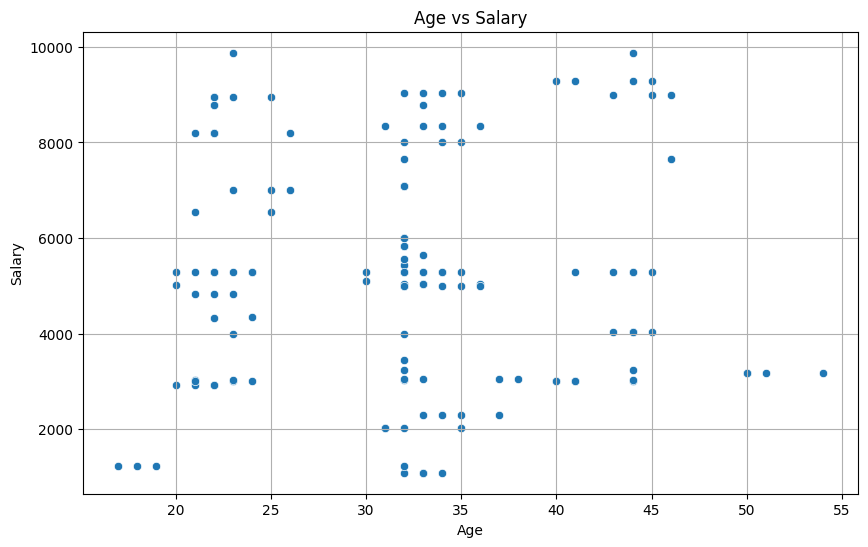

In [44]:
# Plot a chart with age and salary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Salary', data=data)
plt.title('Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

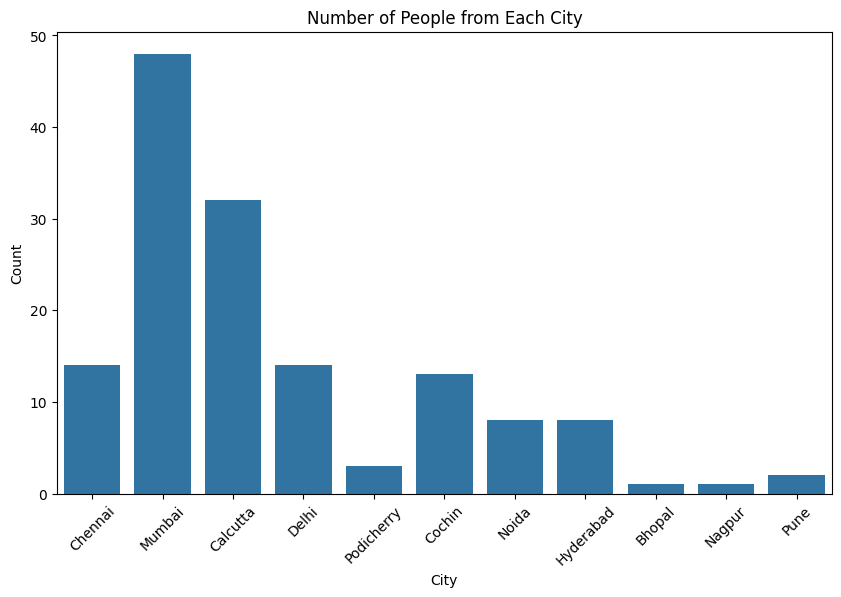

In [45]:
# Count the number of people from each place and represent it visually
plt.figure(figsize=(10, 6))
sns.countplot(x='City', data=data)
plt.title('Number of People from Each City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.show()

In [46]:
#Data Encoding

In [47]:
#One-hot encoding

In [48]:
#Get_dummies() function

In [49]:
import numpy as np

In [50]:
# Usethe get_dummies() function from pandas to perform one-hot encoding on categorical variable
one_hot_encoded_data=pd.get_dummies(data=data,columns = ['Company','City','Country'])
one_hot_encoded_data

,Age,Salary,Gender,Company_CTS,Company_Congnizant,Company_Infosys,Company_TCS,City_Bhopal,City_Calcutta,City_Chennai,City_Cochin,City_Delhi,City_Hyderabad,City_Mumbai,City_Nagpur,City_Noida,City_Podicherry,City_Pune,Country_India
0,20.0,5283.0,0,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True
1,30.0,5283.0,0,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True
2,35.0,2300.0,0,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True
3,40.0,3000.0,0,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True
4,23.0,4000.0,0,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,22.0,8202.0,0,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True
140,33.0,9024.0,1,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True
141,44.0,4034.0,1,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True
142,33.0,5034.0,1,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True


In [51]:
#OneHotEncoding

In [54]:

import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [53]:
!pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/ae/20/6d1a0a61d468b37a142fd90bb93c73bc1c2205db4a69ac630ed218c31612/scikit_learn-1.5.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for joblib>=1.2.0 from https://files.pythonhosted.org/packages/91/29/df4b9b42f2be0b623cbd5e2140cafcaa2bef0759a00b7b70104dcfe2fb51/joblib-1.4.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=3.1.0 from https://files.pythonhosted.org/packages/4b/2c/ffbf7a134b9ab11a67b0cf0726453cedd9c5043a4fe7a35d1cefa9a1bcfb/threadpoolctl-3.5.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB 660.6 kB/s eta 0:00:17
   ---------------------------------------- 0.1/11.0 MB 1.1 MB/s eta 0:00:11
    --------------------------------------- 0.3/11.0 MB 2.0 MB/s eta 0:00:06
   - -------------------------------------- 0.5/11.0 MB 3


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [55]:
columns_to_encode=['Company','City','Country']

In [56]:
new_encoded_columns_names= []

In [57]:
for col in columns_to_encode:
    new_encoded_columns_names+=[f"is_{category}" for category in data[col].unique().tolist()]

In [58]:

print(new_encoded_columns_names)

['is_TCS', 'is_Infosys', 'is_CTS', 'is_Congnizant', 'is_Chennai', 'is_Mumbai', 'is_Calcutta', 'is_Delhi', 'is_Podicherry', 'is_Cochin', 'is_Noida', 'is_Hyderabad', 'is_Bhopal', 'is_Nagpur', 'is_Pune', 'is_India']


In [64]:
one_hot_encoder=OneHotEncoder(sparse_output = 0, handle_unknown = 'ignore')

In [67]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

df = pd.read_csv(r"C:\Users\aarsh\Downloads\L - Task3 - Data Preprocessing\Employee.csv")

columns_to_encode = df.select_dtypes(include=['object']).columns

one_hot_encoder = OneHotEncoder(sparse_output=False)

encoded_columns = one_hot_encoder.fit_transform(df[columns_to_encode])

print(encoded_columns)

encoded_df = pd.DataFrame(encoded_columns, columns=one_hot_encoder.get_feature_names_out(columns_to_encode))

print(encoded_df)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 1.]]
     Company_CTS  Company_Congnizant  Company_Infosys  \
0            0.0                 0.0              0.0   
1            0.0                 0.0              1.0   
2            0.0                 0.0              0.0   
3            0.0                 0.0              1.0   
4            0.0                 0.0              0.0   
..           ...                 ...              ...   
143          0.0                 0.0              0.0   
144          0.0                 0.0              1.0   
145          0.0                 0.0              1.0   
146          0.0                 0.0              0.0   
147          0.0                 0.0              1.0   

     Company_Infosys Pvt Lmt  Company_TCS  Company_Tata Consultancy Services  \
0                        0.0          1.0                                0.0   

In [69]:
columns_to_encode = df.select_dtypes(include=['object']).columns

one_hot_encoder = OneHotEncoder(sparse_output=False)


encoded_columns = one_hot_encoder.fit_transform(df[columns_to_encode])


new_encoded_columns_names = one_hot_encoder.get_feature_names_out(columns_to_encode)


data_encoded = pd.DataFrame(encoded_columns, columns=new_encoded_columns_names)

print(data_encoded)

     Company_CTS  Company_Congnizant  Company_Infosys  \
0            0.0                 0.0              0.0   
1            0.0                 0.0              1.0   
2            0.0                 0.0              0.0   
3            0.0                 0.0              1.0   
4            0.0                 0.0              0.0   
..           ...                 ...              ...   
143          0.0                 0.0              0.0   
144          0.0                 0.0              1.0   
145          0.0                 0.0              1.0   
146          0.0                 0.0              0.0   
147          0.0                 0.0              1.0   

     Company_Infosys Pvt Lmt  Company_TCS  Company_Tata Consultancy Services  \
0                        0.0          1.0                                0.0   
1                        0.0          0.0                                0.0   
2                        0.0          1.0                                0.

In [70]:
#Label encoding

In [71]:
from sklearn.preprocessing import LabelEncoder

In [72]:
label_encoder= LabelEncoder()
for i in data:
    data[i]=label_encoder.fit_transform(data[i])
data 

,Company,Age,Salary,City,Country,Gender
0,3,3,21,2,0,0
1,2,10,21,6,0,0
2,3,15,3,1,0,0
3,2,19,5,4,0,0
4,3,6,12,6,0,0
...,...,...,...,...,...,...
139,2,5,33,6,0,0
140,3,13,38,1,0,1
141,2,22,13,4,0,1
142,3,13,19,6,0,1


In [73]:
#Feature Scaling

In [74]:
#StandardScaler

In [76]:
#from sklearn.preprocessing import StandardScaler

In [77]:
scaler=StandardScaler()

In [78]:
scaler.fit(data)

StandardScaler()

In [80]:
scaled_data=scaler.transform(data)
print(scaled_data)

[[ 0.9000463  -1.51076223  0.13960436 -0.89325451  0.         -0.53452248]
 [ 0.05844457 -0.39756901  0.13960436  0.7505621   0.         -0.53452248]
 [ 0.9000463   0.39756901 -1.36812276 -1.30420866  0.         -0.53452248]
 [ 0.05844457  1.03367942 -1.20059753 -0.07134621  0.         -0.53452248]
 [ 0.9000463  -1.03367942 -0.6142592   0.7505621   0.         -0.53452248]
 [ 0.05844457 -0.0795138  -0.19544611 -1.30420866  0.         -0.53452248]
 [ 0.9000463  -0.0795138   0.55841745 -0.89325451  0.          1.87082869]
 [ 0.05844457 -1.03367942  0.80970531  0.7505621   0.          1.87082869]
 [ 0.9000463   0.23854141  1.06099316 -1.30420866  0.          1.87082869]
 [-1.62475891  1.66978984  1.47980625 -0.07134621  0.         -0.53452248]
 [-1.62475891 -1.03367942  0.13960436  0.7505621   0.         -0.53452248]
 [-1.62475891  0.23854141 -1.61941062 -1.30420866  0.         -0.53452248]
 [-1.62475891  1.66978984  0.13960436 -0.89325451  0.         -0.53452248]
 [-1.62475891 -1.82881744

In [81]:
#Minmaxscaler

In [84]:
from sklearn.preprocessing import MinMaxScaler

In [85]:
scaler=MinMaxScaler()

In [86]:
scaler.fit(data)

MinMaxScaler()

In [87]:
scaled_data=scaler.transform(data)
print(scaled_data)

[[1.         0.11111111 0.525      0.2        0.         0.        ]
 [0.66666667 0.37037037 0.525      0.6        0.         0.        ]
 [1.         0.55555556 0.075      0.1        0.         0.        ]
 [0.66666667 0.7037037  0.125      0.4        0.         0.        ]
 [1.         0.22222222 0.3        0.6        0.         0.        ]
 [0.66666667 0.44444444 0.425      0.1        0.         0.        ]
 [1.         0.44444444 0.65       0.2        0.         1.        ]
 [0.66666667 0.22222222 0.725      0.6        0.         1.        ]
 [1.         0.51851852 0.8        0.1        0.         1.        ]
 [0.         0.85185185 0.925      0.4        0.         0.        ]
 [0.         0.22222222 0.525      0.6        0.         0.        ]
 [0.         0.51851852 0.         0.1        0.         0.        ]
 [0.         0.85185185 0.525      0.2        0.         0.        ]
 [0.         0.03703704 0.025      0.6        0.         0.        ]
 [0.66666667 0.7037037  0.125     